Load dataset downloaded from kaggle

In [8]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_disease_risk_dataset.csv to synthetic_disease_risk_dataset.csv


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load dataset
df = pd.read_csv("synthetic_disease_risk_dataset.csv")

In [11]:
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Glucose_Level,Family_History,Genetic_Risk_Score,Previous_Diagnosis,Disease_Risk
0,P100000,69,Female,27.8,Never,NaN,Low,92,117,297,156,Yes,0.52,NaN,No
1,P100001,32,Female,32.0,Never,Moderate,Moderate,149,77,279,163,Yes,0.50,NaN,Yes
2,P100002,89,Male,24.2,Former,High,High,124,82,189,139,Yes,0.37,Diagnosed,No
3,P100003,78,Male,23.8,Never,NaN,Moderate,118,81,159,169,No,0.55,NaN,No
4,P100004,38,Male,29.8,Never,Moderate,Moderate,164,63,213,97,Yes,0.59,Pre-disease,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                4000 non-null   object 
 1   Age                       4000 non-null   int64  
 2   Gender                    4000 non-null   object 
 3   BMI                       4000 non-null   float64
 4   Smoking_Status            4000 non-null   object 
 5   Alcohol_Consumption       2361 non-null   object 
 6   Physical_Activity_Level   4000 non-null   object 
 7   Blood_Pressure_Systolic   4000 non-null   int64  
 8   Blood_Pressure_Diastolic  4000 non-null   int64  
 9   Cholesterol_Level         4000 non-null   int64  
 10  Glucose_Level             4000 non-null   int64  
 11  Family_History            4000 non-null   object 
 12  Genetic_Risk_Score        4000 non-null   float64
 13  Previous_Diagnosis        1973 non-null   object 
 14  Disease_

Clean and process

In [14]:
df.drop("Patient_ID", axis=1, inplace=True)
df['Disease_Risk'] = df['Disease_Risk'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df, drop_first=True)

Split and Scale

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X = df_encoded.drop('Disease_Risk', axis=1)
y = df_encoded['Disease_Risk']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Model - Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Evaluate Model - Random Forest

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9025
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       671
           1       0.88      0.46      0.60       129

    accuracy                           0.90       800
   macro avg       0.89      0.72      0.77       800
weighted avg       0.90      0.90      0.89       800

Confusion Matrix:
 [[663   8]
 [ 70  59]]


In [32]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]  # Get probability for class 1
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


ROC AUC Score: 0.9515186173592578


XGBoost Model

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Step 1: Calculate class weights manually
neg_count = sum(y_train == 0)
pos_count = sum(y_train == 1)
scale_pos_weight = neg_count / pos_count

In [35]:
print(f"Negative samples: {neg_count}, Positive samples: {pos_count}")
print(f"Using scale_pos_weight: {scale_pos_weight:.2f}")

Negative samples: 2748, Positive samples: 452
Using scale_pos_weight: 6.08


In [36]:
# Step 2: Train XGBoost model with imbalance handling
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:15:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [37]:
# Step 3: Evaluate on test data
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.90375
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       671
           1       0.70      0.70      0.70       129

    accuracy                           0.90       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.90      0.90      0.90       800

Confusion Matrix:
 [[633  38]
 [ 39  90]]
ROC AUC Score: 0.9575318568837441


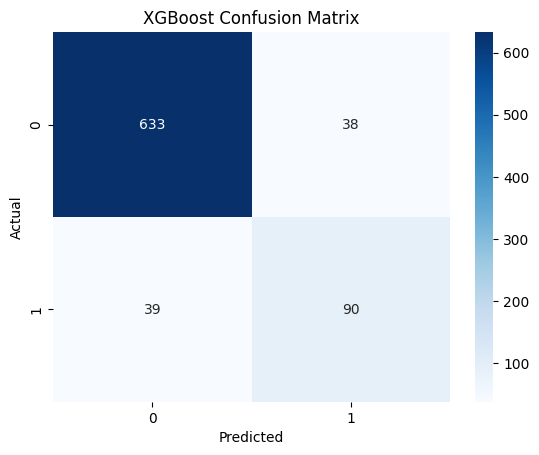

In [39]:
# Step 4: Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SHAP Explainability

In [42]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

In [46]:
feature_names = X.columns.tolist()  # if X is your encoded feature dataframe

In [47]:
# Set feature names
X_test_df = pd.DataFrame(X_test, columns=feature_names)  # Replace with actual names from df

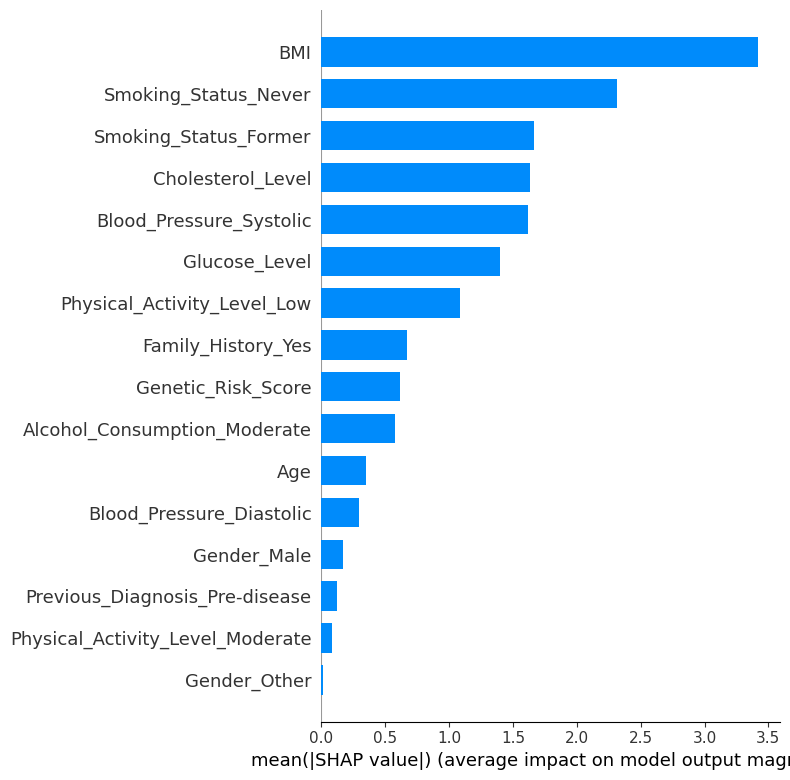

In [48]:
# Plot with correct labels
shap.summary_plot(shap_values, X_test_df, plot_type="bar")

Model Finalization

In [49]:
import joblib
joblib.dump(xgb_model, 'disease_risk_xgboost_model.pkl')

['disease_risk_xgboost_model.pkl']

Save SHAP values

In [53]:
import shap
import pandas as pd
import numpy as np

In [55]:
# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values, columns=feature_names)

In [56]:
# Save to CSV
shap_df.to_csv("shap_values.csv", index=False)

In [57]:
from google.colab import files
files.download("shap_values.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>